In [1]:
import pandas as pd  #data processing eg reading file
import numpy as np   #linear algebra
import matplotlib.pyplot as plt  #creating plots
import seaborn as sns #plotting vectors
from sklearn.model_selection import train_test_split #to slit data into training and testing set
from sklearn.preprocessing import StandardScaler #performs feature scaling
from sklearn.linear_model import LinearRegression #linear model to be used
from sklearn.tree import DecisionTreeRegressor #DecisionTree model to be used
from sklearn.ensemble import RandomForestRegressor #RandomForest model to be used
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score #accuracy matrices to measure accuracy of the model to evaluate model performance

In [3]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing()

In [4]:
print(housing_data.DESCR) #prints the description of dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
df=pd.DataFrame(housing_data.data)  #converting into a dataframe
df.columns=housing_data.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['MedHouseVal']=housing_data.target  #add column for target variable as the dependent data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info() #gives more info on columns such as the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.shape #shows rows and columns

(20640, 9)

In [15]:
df.isnull().sum() #checking for sum of null values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [17]:
df.describe()  #to see statistics of our dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


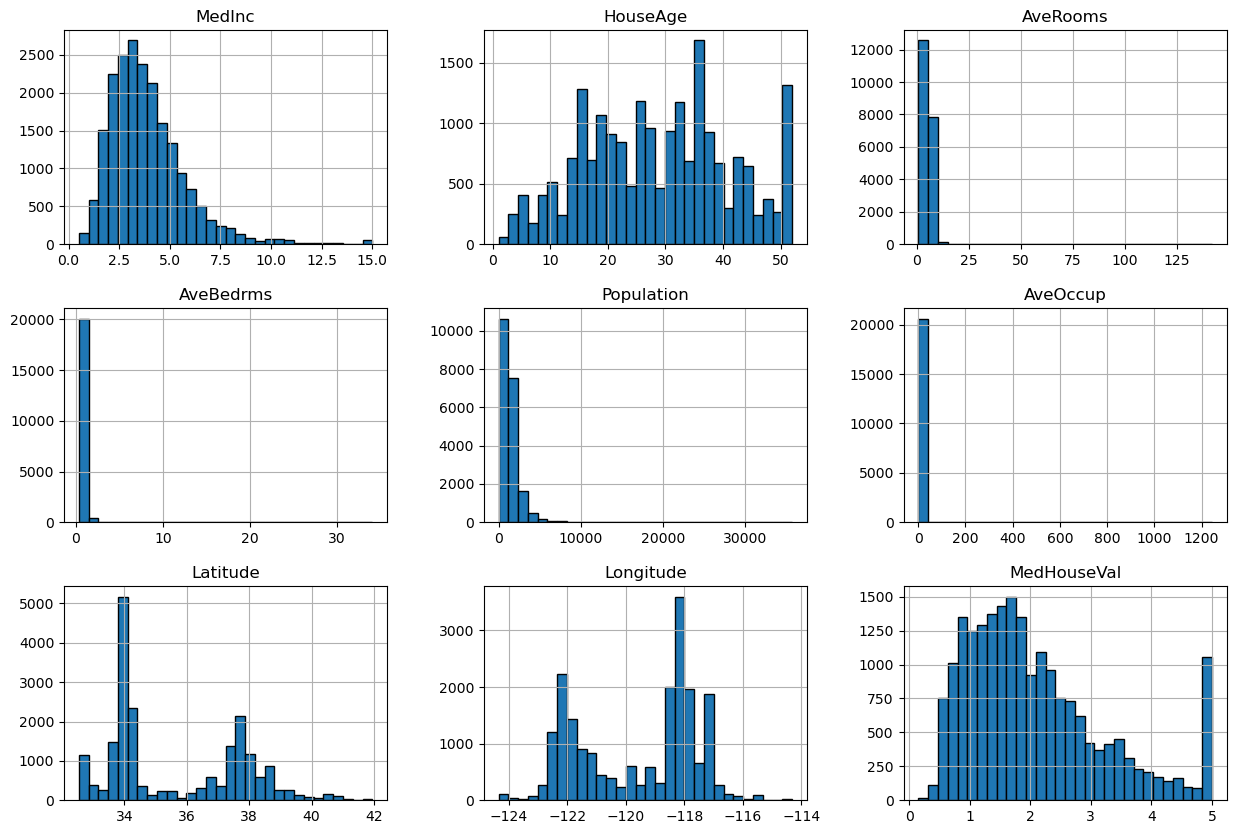

In [19]:
df.hist(figsize=(15,10),bins=30,edgecolor="black")
plt.show()

Text(0.5, 1.0, 'Median housing value depending on their spatial location')

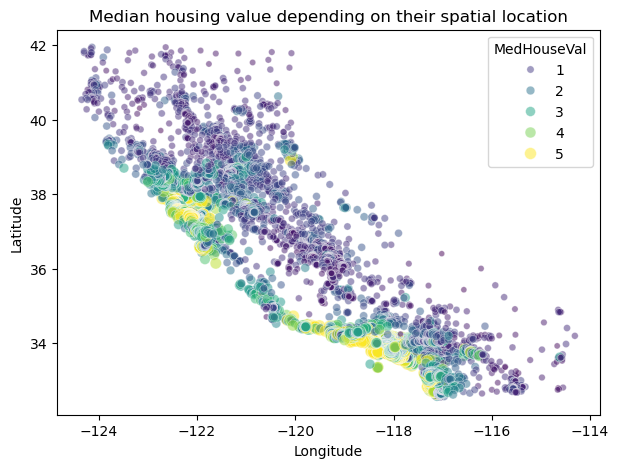

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="Longitude",y="Latitude",hue="MedHouseVal",size="MedHouseVal",palette="viridis",alpha=0.5)
plt.legend(title="MedHouseVal",loc="upper right")
plt.title("Median housing value depending on their spatial location")

In [21]:
#finding correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


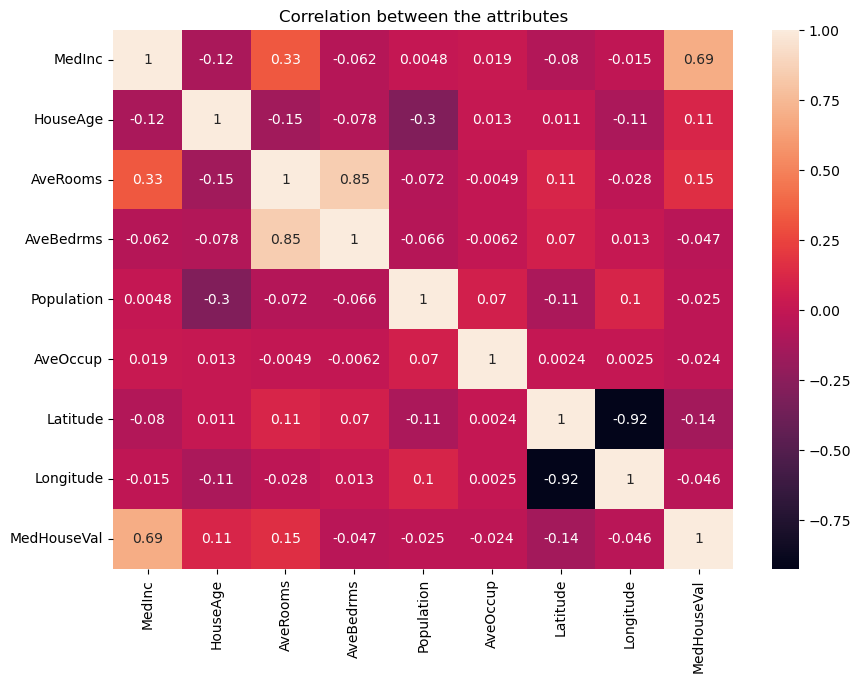

In [23]:
#heapmap to correlate data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [27]:
df.corr()['MedHouseVal'].sort_values()  #printing correlation in ascending order

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

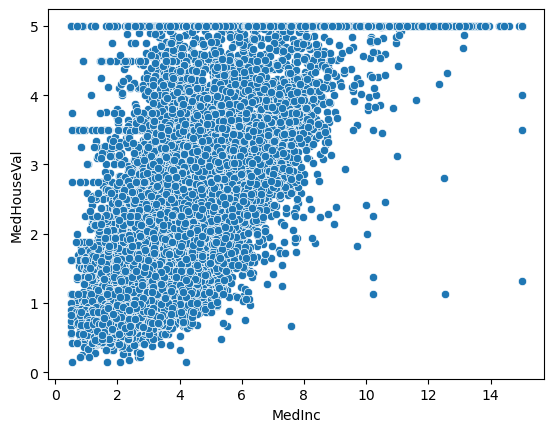

In [29]:
sns.scatterplot(x=df['MedInc'],y=df['MedHouseVal'])

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

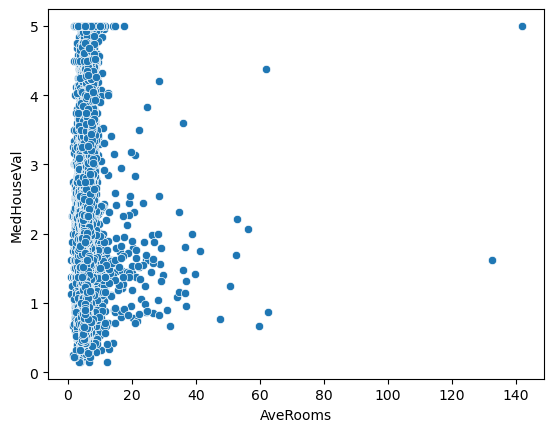

In [31]:
sns.scatterplot(x=df['AveRooms'],y=df['MedHouseVal'])

In [33]:
#splitting data
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)  #random_state is used to ensure consistent output

In [37]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (14448, 8)
x_test: (6192, 8)
y_train: (14448,)
y_test: (6192,)


In [62]:
#scaling data to improve performance
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [41]:
#linear regression model training
linreg=LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)

In [43]:
#calculating mean absolute errors
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_mse=mean_squared_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)
print("MAE of the linear regression model is:",linreg_mae)
print("MSE of the linear regression model is:",linreg_mse)
print("R2 of the linear regression model is:",linreg_r2)

MAE of the linear regression model is: 0.5272474538305952
MSE of the linear regression model is: 0.5305677824766754
R2 of the linear regression model is: 0.5957702326061662


In [45]:
#Decision tree model training
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)

In [47]:
#calculating mean absolute errors
dtree_mae=mean_absolute_error(y_test,dtree_pred)
dtree_mse=mean_squared_error(y_test,dtree_pred)
dtree_r2=r2_score(y_test,dtree_pred)
print("MAE of the linear decision tree model is:",dtree_mae)
print("MSE of the linear decision tree model is:",dtree_mse)
print("R2 of the linear decision tree model is:",dtree_r2)

MAE of the linear decision tree model is: 0.46953852228682175
MSE of the linear decision tree model is: 0.5242319360699774
R2 of the linear decision tree model is: 0.6005973966440339


In [49]:
#RandomForest model training
rforest=RandomForestRegressor()
rforest.fit(x_train,y_train)
rforest_pred=rforest.predict(x_test)

In [51]:
#calculating mean absolute errors
rforest_mae=mean_absolute_error(y_test,rforest_pred)
rforest_mse=mean_squared_error(y_test,rforest_pred)
rforest_r2=r2_score(y_test,rforest_pred)
print("MAE of the  random forest regressor model is:",rforest_mae)
print("MSE of the  random forest regressor model is:",rforest_mse)
print("R2 of the  random forest regressor model is:",rforest_r2)

MAE of the  random forest regressor model is: 0.33209224169896656
MSE of the  random forest regressor model is: 0.25651429588329816
R2 of the  random forest regressor model is: 0.8045665085918461


In [53]:
data={'MedInc':7.2574, 'HouseAge':52.0, 'AveRooms':8.288136, 'AveBedrms':1.073446, 'Population':496.0, 'AveOccup':2.802260,
       'Latitude':37.85, 'Longitude':-122.24}
index=[0]
new_df=pd.DataFrame(data,index)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.2574,52.0,8.288136,1.073446,496.0,2.80226,37.85,-122.24


In [55]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [57]:
#predicting using random forestor
value_pred=rforest.predict(new_df)
print("The median housing value for the new data is:",value_pred)

The median housing value for the new data is: [3.9200747]


C:\Users\Everlyn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
